In [1]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
import joblib

In [2]:
labels=[]
features=[]
file=open('Training Dataset.arff').read()
list=file.split('\n')
data=np.array(list)
data_new=[i.split(',') for i in data]
data_new=data_new[0:-1]

In [3]:
for i in data_new:
    labels.append(i[30])
data_new = np.array(data_new)
features = data_new[:,:-1]
features = features[:, [0, 1, 2, 3, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 18, 21, 23, 24, 25, 26, 27, 28]]
features = np.array(features).astype(np.float)
features_train = features
labels_train = labels

In [4]:
len(features_train)

11054

In [5]:
print("\n\n ""Random Forest Algorithm Results"" ")
clf4 = RandomForestClassifier(min_samples_split=7, verbose=True)
clf4.fit(features_train, labels_train)



 Random Forest Algorithm Results 


c:\users\chira\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [6]:
importances = clf4.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf4.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(features_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.393164)
2. feature 10 (0.185318)
3. feature 5 (0.088433)
4. feature 18 (0.078942)
5. feature 11 (0.040285)
6. feature 4 (0.036150)
7. feature 7 (0.020005)
8. feature 12 (0.018638)
9. feature 21 (0.017384)
10. feature 9 (0.016409)
11. feature 16 (0.012603)
12. feature 0 (0.012574)
13. feature 17 (0.011949)
14. feature 20 (0.011489)
15. feature 19 (0.010860)
16. feature 1 (0.009833)
17. feature 8 (0.007853)
18. feature 15 (0.006708)
19. feature 13 (0.006624)
20. feature 14 (0.005567)
21. feature 2 (0.004744)
22. feature 3 (0.004468)


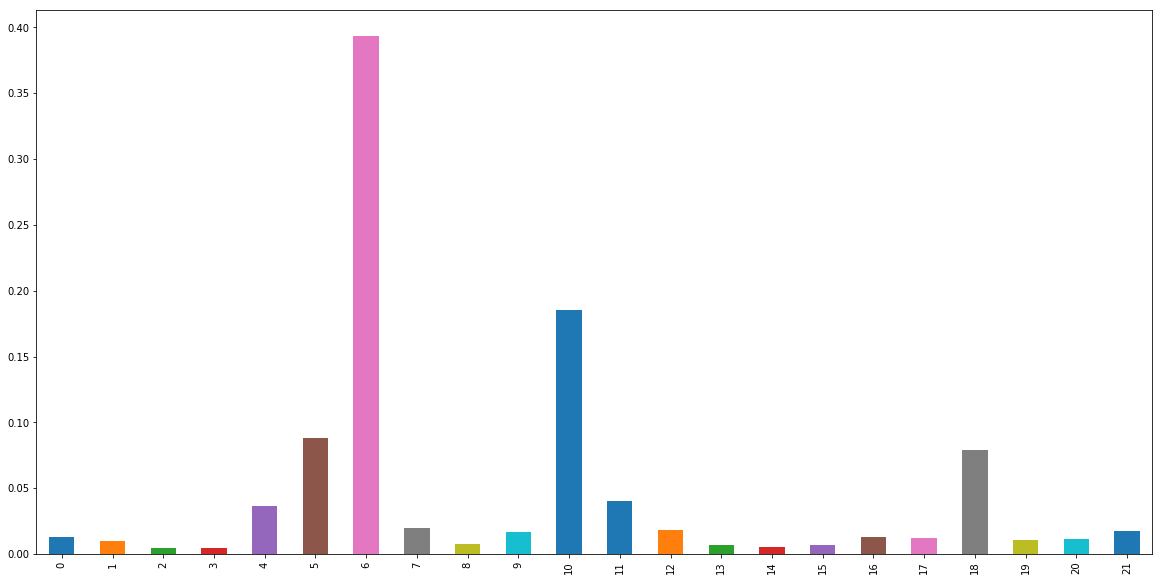

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
pd.Series(clf4.feature_importances_).plot(kind='bar')

In [8]:
features_test=features[10000:]
labels_test=labels[10000:]

In [9]:
pred4=clf4.predict(features_test)
print(classification_report(labels_test, pred4))
print('The accuracy is:', 100*accuracy_score(labels_test, pred4),'%')
print(metrics.confusion_matrix(labels_test, pred4))

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       460
           1       0.98      0.99      0.98       594

   micro avg       0.98      0.98      0.98      1054
   macro avg       0.98      0.98      0.98      1054
weighted avg       0.98      0.98      0.98      1054

The accuracy is: 98.292220113852 %
[[450  10]
 [  8 586]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
